# Preprocess

In [1]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

# Question1

stop_words   refer to piazza

In [3]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3,stop_words='english')
# fit_tranform train data
X_counts = vectorizer.fit_transform(dataset.data)
print(" X_count size ", X_counts.shape)

 X_count size  (7882, 27768)


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
# fit_tranform data
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(7882, 27768)


In [5]:
print(dataset.target_names[0])
print(dataset.target_names[1])
print(dataset.target_names[2])
print(dataset.target_names[3])
print(dataset.target_names[4])
print(dataset.target_names[5])
print(dataset.target_names[6])
print(dataset.target_names[7])

comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey


In [6]:
print(dataset.target_names[dataset.target[0]],dataset.target[0])
print(dataset.target_names[dataset.target[1]],dataset.target[1])

comp.sys.ibm.pc.hardware 2
comp.os.ms-windows.misc 1


In [363]:
dataset.bintarget = np.zeros_like(dataset.target)
for y in [0, 1, 2, 3]:
    dataset.bintarget[np.argwhere(dataset.target == y)] = 1
for y in [4, 5, 6, 7]:
    dataset.bintarget[np.argwhere(dataset.target == y)] = 0
class_names = ['Recreational Activity','Computer Technology']
print(dataset.bintarget.shape)
dataset.target=dataset.bintarget

(7882,)


In [22]:
dataset.bintarget.sum()

3903

# Question2

In [129]:
from sklearn.cluster import KMeans
from time import time
kmeans = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
t0 = time()
kmeans.fit(X_tfidf)
X_predict = kmeans.predict(X_tfidf)
X_predict.shape
print("done in %0.3fs" % (time() - t0))

done in 607.144s


In [365]:
from sklearn.metrics.cluster import contingency_matrix
con_matrix=contingency_matrix(dataset.target,X_predict)
print(con_matrix)

[[1718 2261]
 [   4 3899]]


In [19]:
import itertools
def plot_contingency_matrix(cm, classes,
                          normalize=False,
                          title='Contingency matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the contingency matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum()
        print("Normalized Contingency matrix")
    else:
        print('Contingency matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized Contingency matrix
[[0.21796498 0.28685613]
 [0.00050749 0.4946714 ]]


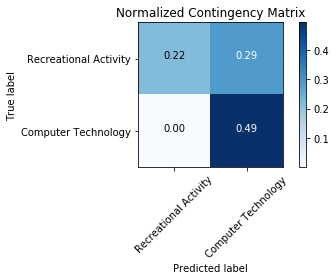

In [24]:
plt.figure()
plot_contingency_matrix(con_matrix, classes=class_names, normalize=True,
                      title='Normalized Contingency Matrix')

plt.show()

Contingency matrix, without normalization
[[1718 2261]
 [   4 3899]]


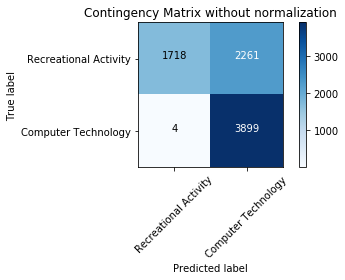

In [25]:
plt.figure()
plot_contingency_matrix(con_matrix, classes=class_names, normalize=False,
                      title='Contingency Matrix without normalization')

plt.show()

# Question3

In [368]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.bintarget, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, kmeans.labels_))
print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, kmeans.labels_))

Homogeneity: 0.254
Completeness: 0.335
V-measure: 0.289
Adjusted Rand-Index: 0.181
Adjusted Mutual Information Score: 0.254


# Question4

In [85]:
from sklearn.decomposition import TruncatedSVD
evar= []
r=[]
svd = TruncatedSVD(n_components=1000, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)
evar.append(svd.explained_variance_ratio_.sum())
r.append(1000)
for i in range(991, 0,-10):
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_reduced = svd.fit_transform(X_reduced)
    evar.append(svd.explained_variance_ratio_.sum()*evar[len(evar)-1])
    r.append(i)

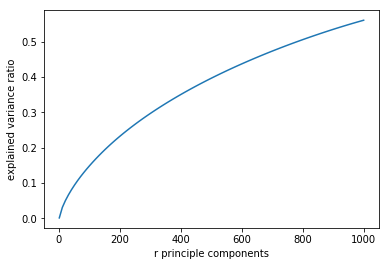

In [86]:
plt.plot(r, evar)
plt.xlabel("r principle components")
plt.ylabel("explained variance ratio")
plt.show()

# Question 5

In [87]:
r_list=[1,2,3,5,10,20,50,100,300]

In [369]:
def svd_kmeans(r):
    svd = TruncatedSVD(n_components=r, random_state=42)
    X_reduced = svd.fit_transform(X_tfidf)
    km = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(X_reduced)
    return [metrics.homogeneity_score(dataset.target, km.labels_),metrics.completeness_score(dataset.target, km.labels_),metrics.v_measure_score(dataset.target, km.labels_),metrics.adjusted_rand_score(dataset.target, km.labels_),metrics.adjusted_mutual_info_score(dataset.target, km.labels_)]
    

In [370]:
print(svd_kmeans(100))
print(svd_kmeans(300))

F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0.2459136851918752, 0.32972145379678475, 0.28171670663624065, 0.17075973241529788, 0.2458446396949744]
[0.24248860014467194, 0.327140669417149, 0.27852460263629775, 0.1667970920946106, 0.24241924081944116]


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [371]:
from sklearn.decomposition import NMF
def NMF_kmeans(r):
    model = NMF(n_components=r, init='random', random_state=42)
    W = model.fit_transform(X_tfidf)
    km = KMeans(n_clusters=2, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(W)
    return [metrics.homogeneity_score(dataset.target, km.labels_),metrics.completeness_score(dataset.target, km.labels_),metrics.v_measure_score(dataset.target, km.labels_),metrics.adjusted_rand_score(dataset.target, km.labels_),metrics.adjusted_mutual_info_score(dataset.target, km.labels_)]
 

In [130]:
measures_svd=[]
measures_NMF=[]
for r in r_list:
    print(r)
    t0 = time()
    measures_svd.append(svd_kmeans(r))    
    print("svd_kmeans for done in %0.3fs" % (time() - t0))
    t0 = time()
    measures_NMF.append(NMF_kmeans(r))
    print("NMF_kmeans for done in %0.3fs" % (time() - t0))

1


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.710s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 0.345s
2


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.806s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 0.806s
3


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.764s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 1.319s
5


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.652s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 1.575s
10


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 0.958s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 4.357s
20


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 1.480s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 10.204s
50


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 2.757s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 29.434s
100


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 5.219s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


NMF_kmeans for done in 154.279s
300


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


svd_kmeans for done in 15.988s
NMF_kmeans for done in 1403.858s


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [132]:
def plot_measure(r_list,score_case,reduced_type):
    y=[]
    if reduced_type==1:
        for i in range(len(r_list)):
            y.append(measures_svd[i][score_case-1])
        #plt.plot(r_list, y)
        plt.plot(y)
        plt.title("Truncated SVD")
    else:
        for i in range(len(r_list)):
            y.append(measures_NMF[i][score_case-1])
        plt.plot(y)#plt.plot(r_list, y)
        plt.title("NMF")
    plt.xlabel("r components")    
    if score_case==1:
        plt.ylabel("Homogeneity")
    elif score_case==2:
        plt.ylabel("Completeness")
    elif score_case==3:
        plt.ylabel("V-measure")
    elif score_case==4:
        plt.ylabel("Adjusted Rand-Index")
    elif score_case==5:
        plt.ylabel("Adjusted Mutual Info Score")

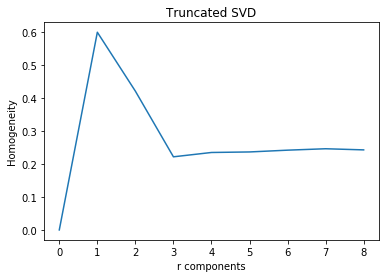

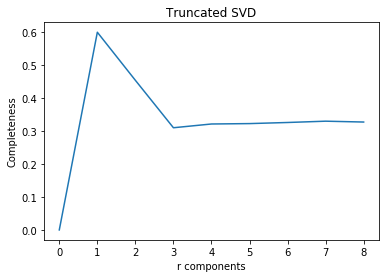

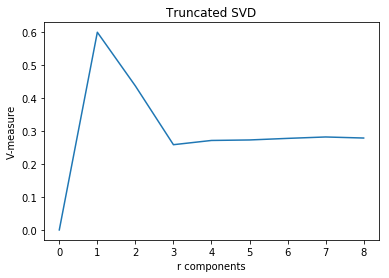

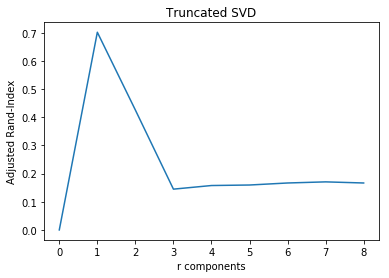

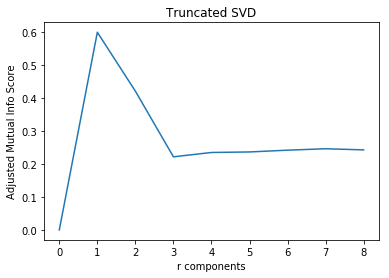

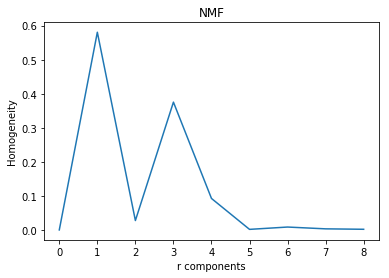

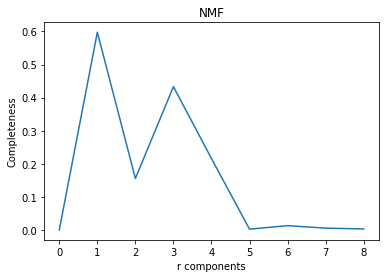

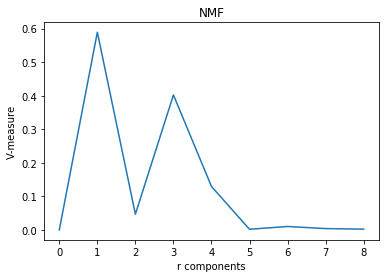

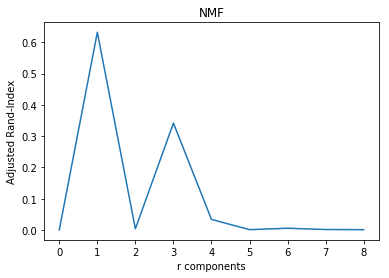

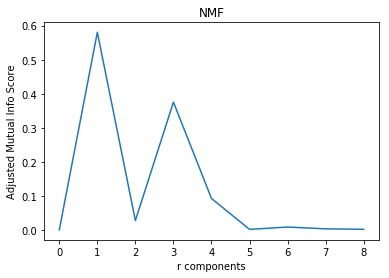

In [133]:
plt.figure();plot_measure(r_list,1,1)
plt.figure();plot_measure(r_list,2,1)
plt.figure();plot_measure(r_list,3,1)
plt.figure();plot_measure(r_list,4,1)
plt.figure();plot_measure(r_list,5,1)
plt.figure();plot_measure(r_list,1,2)
plt.figure();plot_measure(r_list,2,2)
plt.figure();plot_measure(r_list,3,2)
plt.figure();plot_measure(r_list,4,2)
plt.figure();plot_measure(r_list,5,2)
plt.show()

In [354]:
r_svd_best=r_list[1]
r_NMF_best=r_list[1]

# Question 6

# Question 7

In [376]:
def dim_reduced_visualization(svd_NMF,r_best,X_tfidf,n_cluster,dataset):
    if svd_NMF==1:
        svd = TruncatedSVD(n_components=r_best, random_state=42)
        X_vis = svd.fit_transform(X_tfidf)        
        title='(SVD)'
    else:
        model = NMF(n_components=r_best, init='random', random_state=42)
        X_vis = model.fit_transform(X_tfidf)
        title='(NMF)'
    km_vis = KMeans(n_clusters=n_cluster, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km_vis.fit(X_vis) 
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_reduced)
        
    plt.figure()
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title1='Clustering label'+title
    plt.xlabel(title1)
    plt.figure()   
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*dataset.target[i],0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title1='Ground truth class label'+title
    plt.xlabel(title1)
    plt.show()

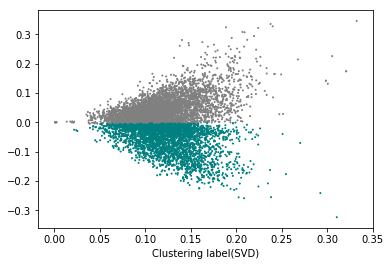

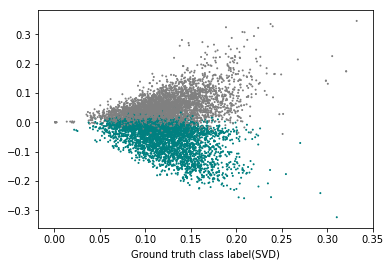

In [377]:
dim_reduced_visualization(1,r_svd_best,X_tfidf,2,dataset)

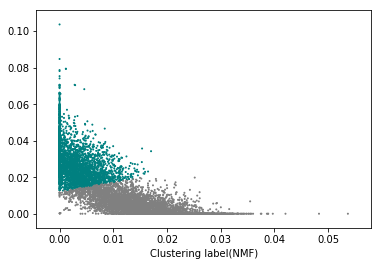

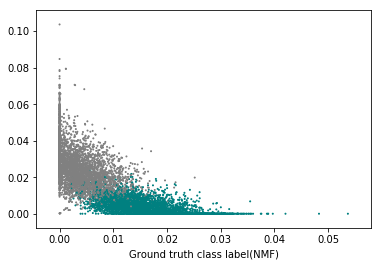

In [361]:
dim_reduced_visualization(2,r_NMF_best,X_tfidf,2,dataset)

# Question 8 9 10

In [373]:
def transformation_visualization(svd_NMF,r_best,scal,trans,order,X_tfidf,n_cluster,dataset):
    if svd_NMF==1:
        svd = TruncatedSVD(n_components=r_best, random_state=42)
        X_vis = svd.fit_transform(X_tfidf)         
        title1='(SVD) '
    else:
        model = NMF(n_components=r_best, init='random', random_state=42)
        X_vis = model.fit_transform(X_tfidf)        
        title1='(NMF) '
    if scal==1:
        title2='with scaling features'
        X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
        
    if trans==1:
        title2='with transformation features'
        X_vis=np.sign(X_vis)*(np.log(np.sign(X_vis)*X_vis+0.01)-np.log(0.01))
    if order==2:
        title2='transformation and then scaling'
        X_vis=(X_vis-np.mean(X_vis,axis=0, keepdims=True))/np.sqrt(np.var(X_vis,axis=0, keepdims=True))
    elif order==1:
        title2='scaling and then transformaiton'
    km_vis = KMeans(n_clusters=n_cluster, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km_vis.fit(X_vis)
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_reduced)
        
    plt.figure()
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title='Clustering label'+title1+title2
    plt.xlabel(title)
    plt.figure()   
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*dataset.target[i],0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title='Ground truth class label'+title1+title2
    plt.xlabel(title)
    plt.show()
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, km_vis.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, km_vis.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, km_vis.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(dataset.target, km_vis.labels_))
    print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(dataset.target, km_vis.labels_))

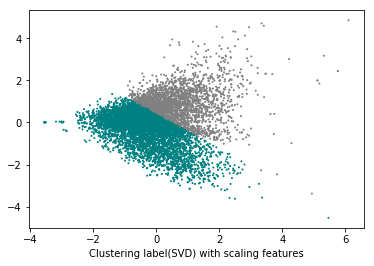

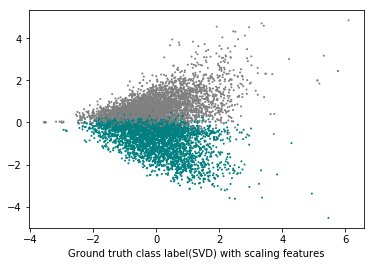

Homogeneity: 0.235
Completeness: 0.263
V-measure: 0.248
Adjusted Rand-Index: 0.255
Adjusted Mutual Information Score: 0.235


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


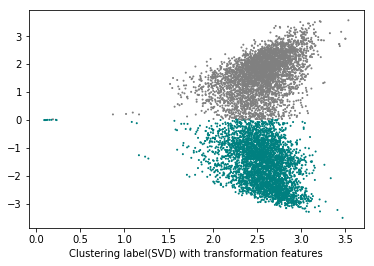

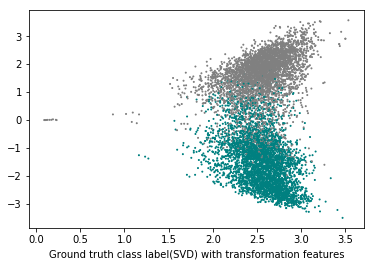

Homogeneity: 0.602
Completeness: 0.602
V-measure: 0.602
Adjusted Rand-Index: 0.710
Adjusted Mutual Information Score: 0.602


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


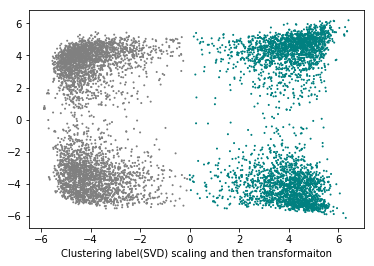

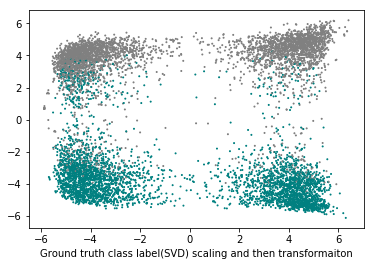

Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Adjusted Mutual Information Score: -0.000


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


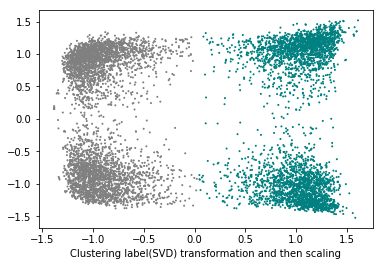

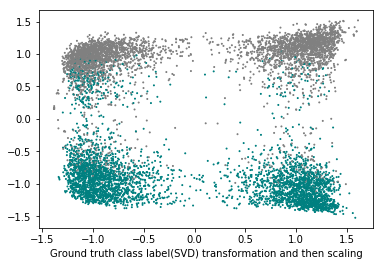

Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Adjusted Mutual Information Score: -0.000


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


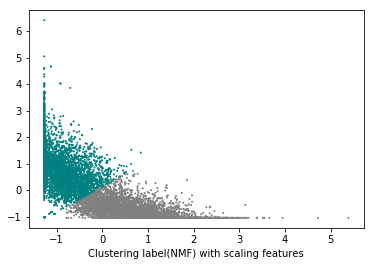

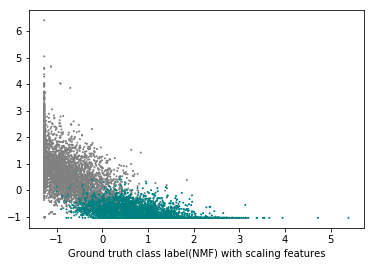

Homogeneity: 0.683
Completeness: 0.686
V-measure: 0.684
Adjusted Rand-Index: 0.773
Adjusted Mutual Information Score: 0.683


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


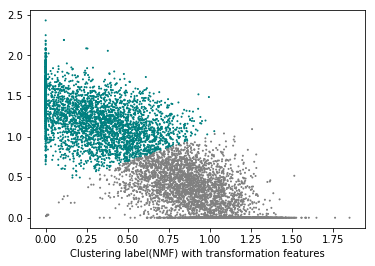

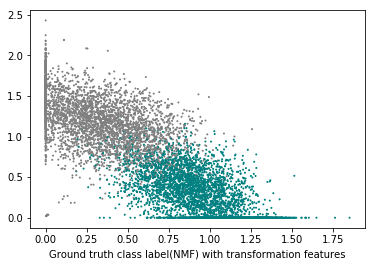

Homogeneity: 0.701
Completeness: 0.702
V-measure: 0.701
Adjusted Rand-Index: 0.796
Adjusted Mutual Information Score: 0.701


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


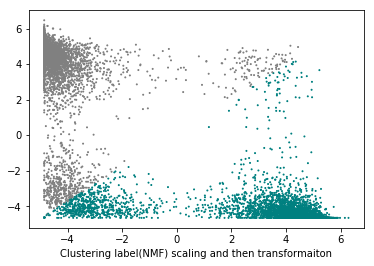

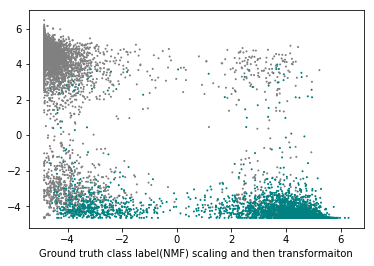

Homogeneity: 0.693
Completeness: 0.695
V-measure: 0.694
Adjusted Rand-Index: 0.785
Adjusted Mutual Information Score: 0.693


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


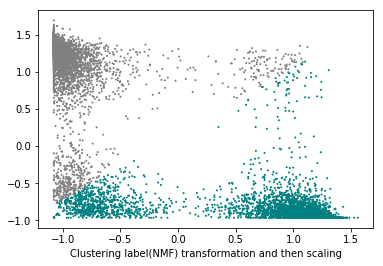

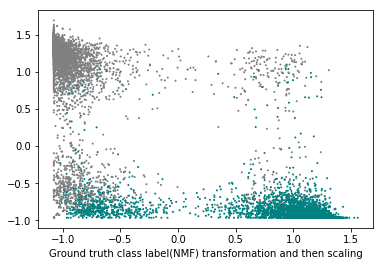

Homogeneity: 0.674
Completeness: 0.678
V-measure: 0.676
Adjusted Rand-Index: 0.758
Adjusted Mutual Information Score: 0.674


F:\jupyter\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [374]:
transformation_visualization(1,r_svd_best,1,0,0,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,0,1,0,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,1,1,1,X_tfidf,2,dataset)
transformation_visualization(1,r_svd_best,1,1,2,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,1,0,0,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,0,1,0,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,1,1,1,X_tfidf,2,dataset)
transformation_visualization(2,r_NMF_best,1,1,2,X_tfidf,2,dataset)

# Question 11 12

In [318]:
Alldataset = fetch_20newsgroups(subset='all', categories=None,shuffle=True, random_state=42)

In [346]:
vectorizer = CountVectorizer(min_df=3,stop_words='english')
# fit_tranform train data
X_all_counts = vectorizer.fit_transform(Alldataset.data)
print(" X_all_count size ", X_all_counts.shape)
tfidf_transformer = TfidfTransformer()
# fit_tranform data
X_all_tfidf = tfidf_transformer.fit_transform(X_all_counts)
print(X_all_tfidf.shape)

 X_all_count size  (18846, 52295)
(18846, 52295)


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

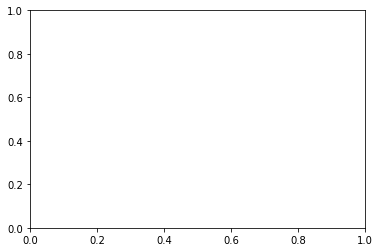

In [375]:
dim_reduced_visualization(1,r_svd_best,X_tfidf,2,dataset)
dim_reduced_visualization(1,50,X_all_tfidf,20,Alldataset)

In [340]:
_, idx = np.unique(Alldataset.target, return_index=True)
print(idx)
print(len(idx))
print(idx.shape[0])
for i in range(len(idx)):
    #print(i,idx[i],Alldataset.target[idx[i]],Alldataset.target_names[idx[i]])
Alldataset.target_names[0]

IndentationError: expected an indented block (<ipython-input-340-72cfa0c791c6>, line 7)

In [238]:
title='rr'
title=title+' gg'
print(title)

rr gg


In [119]:
for x in range(len(r_list)):
    print (x)

0
1
2
3
4
5
6
7
8


In [113]:
num = 5     
if num == 3:            # 判断num的值
    print ('boss')        
elif num == 2:
    print ('user')
elif num == 1:
    print ('worker')
elif num < 0:           # 值小于零时输出
    print ('error')
else:
    print ('roadman')     # 条件均不成立时输出

roadman
